<center>
<h1></h1>
<h1>UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE</h1>
<h1>INSTITUTO METRÓPOLE DIGITAL</h1>

<hr>

<h3>IMD1151 - CIÊNCIAS DE DADOS - T01 (2024.1)</h3>
<h3>Docentes:  HEITOR MEDEIROS FLORENCIO e DANIEL SABINO AMORIM DE ARAUJO</h3>

</center>
<hr>

#Projeto Parte II - Análise de Políticas de Privacidade

<hr>
<p>DOUGLAS FELIPE DE LIMA SILVA</p>
<hr>

**Objetivo:** Aplicar metodologias de aprendizado não supervisionado utilizando políticas de privacidade de diversas empresas e setores, disponíveis em formato PDF. O objetivo é extrair e processar os dados desses documentos categorizar automaticamente novos textos de políticas de privacidades.

<hr>
<h1>Parte 1: Pré-Processamento e Vetorização</h1>
<hr>

##Instalação de bibliotecas necessárias

In [ ]:
#Instalar bibloteca necessárias
!pip install PyPDF2
!pip install nltk
!pip install scikit-learn
!pip install spacy
!python -m spacy download pt_core_news_sm

# Baixa os recursos necessários da NLTK para português
nltk.download('punkt')
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 25.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


##Bibliotecas utilizadas

In [ ]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

# Visualização de dados
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

# Processamento de texto e NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
import spacy
import re

# Utilitários e manipulação de arquivos
import os
import string
from collections import Counter, defaultdict
import PyPDF2

# Comunicação e arquivos em rede
import requests
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

##Acesso ao dataset
<p>PDFs sobre políticas de privacidade foram coletados e armazenados no google drive como repositório desse dataset. </p>

<b>OBS: Será necessário autenticar com sua conta do drive ao executar o primeiro bloco de script. </p>

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Autenticar e criar a interface do Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# ID da pasta compartilhada no Google Drive
folder_id = '1aEPbePndIE_Q3Bz58EyUuG_fSw4NHuyH'

# Listar os arquivos na pasta
file_list = drive.ListFile({'q': f"'{folder_id}' in parents"}).GetList()

# Listar e contar os arquivos PDF na pasta
pdf_files = [file['title'] for file in file_list if file['mimeType'] == 'application/pdf']

# Contar a quantidade de arquivos PDF na pasta
pdf_count = len(pdf_files)
print(f"A quantidade de arquivos PDF na pasta é: {pdf_count}")

A quantidade de arquivos PDF na pasta é: 85


#Fazendo a leitura dos PDF's

In [ ]:
# Lista para armazenar os dados dos arquivos PDF
data = []

# Loop para ler cada arquivo PDF na pasta compartilhada
for file in file_list:
    if file['mimeType'] == 'application/pdf':
        try:
            # Baixar o arquivo PDF
            file.GetContentFile(file['title'])
            pdf_path = file['title']

            # Ler o PDF e extrair o texto
            pdf_reader = PyPDF2.PdfReader(pdf_path)
            num_pages = len(pdf_reader.pages)
            document_text = []

            # Extrair e limpar o texto de cada página do PDF
            for page_num in range(num_pages):
                page = pdf_reader.pages[page_num]
                text = page.extract_text()
                # Limpar o texto
                clean_text = ' '.join(text.split())
                document_text.append(clean_text)

            # Juntar o texto de todas as páginas em um texto único
            full_text = ' '.join(document_text)

            # Armazenar o nome do arquivo e o texto em uma lista
            data.append([file['title'], full_text])
            print(f"Texto extraído de {file['title']}: {full_text}")

        except Exception as e:
            print(f"Erro ao abrir ou ler o arquivo {file['title']}: {e}")

'''# Imprimir a lista de dados dos arquivos PDF
print("\nDados dos arquivos PDF:")
for item in data:
    print(item)'''

# Contar a quantidade de arquivos PDF lidos
pdf_count = len(data)
print(f"\nA quantidade de arquivos PDF lidos é: {pdf_count}")

Texto extraído de BV_banco.pdf: bancobv.com.br Av. das Nações Unidas, 14171 – Torre A – 18º andar – Vila Gertrudes – 04794 -000 - São Paulo/SP PÚBLICO PCG_00 4 – Segurança Cibernética e de Informação Objetivos Esta política de Segurança Cibernética e de Informação ("Política") é a declaração formal do Banco Votorantim S.A. ("Banco") e sociedades controladas, integrantes do Conglomerado Financeiro Votorantim, em conjunto denominadas nesta Política como ("Conglomerado"), referente ao compromisso com a proteção de suas informações e ativos de informação, bem como das informações e ativos de informação de seus clientes e fornece dores. Esta Política tem como objetivo estabelecer diretrizes e princípios gerais de segurança da informação e segurança cibernética para o Conglomerado, em um esforço para garantir que os usuários atuem em observância às regras referentes ao tratamento e proteção das informações e ativos de informação, bem como assegurar a capacidade do Conglomerado em prevenir, d

Texto extraído de agricase.pdf: Política de Segurança da Informação Política de Segurança da I nformação SÚMARIO 1 INTRODUÇÃO ................................ ................................ ................................ ................................ .......... 3 2 OBJETIVO ................................ ................................ ................................ ................................ ................ 3 3 ABRANGENCIA ................................ ................................ ................................ ................................ ......... 4 4 COMITÊ GESTOR DA POL ÍTICA DE SEGURANÇA D A INFORMAÇÃO: ................................ .......................... 4 5 POLÍTICA DE SEGURANÇ A DA INFORMAÇÃO ................................ ................................ ........................... 4 5..1 Requisitos de segurança da informação ................................ ................................ ....................... 4 5..2 Quadro de conf

#Aplicação de Tokenização, Normalização e Remoção de stop words

In [ ]:
# Função de Tokenização
def tokenize_text(text):
    """Tokeniza um dado texto em palavras.

    Args:
    text (str): O texto a ser tokenizado.

    Returns:
    list: Uma lista contendo tokens individuais.
    """
    tokens = nltk.word_tokenize(text, language='portuguese')  # Tokeniza o texto
    return tokens

# Função de Normalização com filtro para tamanho da palavra
def normalize_text(tokens):
    """Normaliza os tokens convertendo para minúsculas e removendo tokens não alfabéticos ou com menos de 2 caracteres.

    Args:
    tokens (list): Lista de tokens a serem normalizados.

    Returns:
    list: Uma lista de tokens normalizados.
    """
    tokens = [token.lower() for token in tokens if token.isalpha() and len(token) >= 2]
    return tokens

# Função de Remoção de Stopwords com filtro para tamanho da palavra
def remove_stopwords(tokens):
    """Remove stopwords dos tokens fornecidos e filtra palavras com menos de 2 caracteres.

    Args:
    tokens (list): Lista de tokens a serem filtrados.

    Returns:
    list: Uma lista de tokens sem stopwords.
    """
    stop_words = set(nltk.corpus.stopwords.words('portuguese'))
    tokens = [token for token in tokens if token not in stop_words and len(token) >= 2]
    return tokens

# Definir a função para processar e imprimir o texto
def process_and_print_text(text, filename):
    try:
        # Tokenização
        tokens = tokenize_text(text)

        # Normalização
        normalized_tokens = normalize_text(tokens)

        # Remoção de Stopwords
        processed_tokens = remove_stopwords(normalized_tokens)

        processed_text = ' '.join(processed_tokens)  # Convertendo tokens processados de volta para texto
        print(f"Texto processado de {filename}: {processed_text[:100]}...")  # Imprimir os primeiros 100 caracteres do texto processado
        return processed_text
    except Exception as e:
        print(f"Erro ao processar o texto de {filename}: {e}")
        return None

##Imprimir os textos após processamento

In [ ]:
# Criar DataFrame com os dados
df = pd.DataFrame(data, columns=['Filename', 'Text'])

# Imprimir o DataFrame
print("\nDataFrame:")
print(df)


DataFrame:
                       Filename  \
0                  BV_banco.pdf   
1                      CGEE.pdf   
2                    CODATA.pdf   
3           DB_diagnosticos.pdf   
4             unimedChapeco.pdf   
..                          ...   
80                  ambipar.pdf   
81  fundacao_getulio_vargas.pdf   
82            Grupo_Zaffari.pdf   
83                     BDMG.pdf   
84         funcional_health.pdf   

                                                 Text  
0   bancobv.com.br Av. das Nações Unidas, 14171 – ...  
1   Política de Segurança da Informação – CGEE (At...  
2   NORMA DE USO ACEITÁVEL DE ATIVOS DE INFORMAÇÃO...  
3   POLÍTICA DE PRIVACIDADE E TRATAMENTO DE DADOS ...  
4   UNIMED CHAPECÓ POLÍTICA DE SEGURANÇA DA INFORM...  
..                                                ...  
80  POLÍTICA DE PRIVACIDADE E PROTEÇÃO DE DADOS PE...  
81  POLÍTICA DE PRIVACIDADE E PROTEÇÃO DE DADOS PE...  
82  Política Interna de Privacidade e Proteção de ...  
83  POL

In [ ]:
# Aplicar o processamento em cada texto do DataFrame e imprimir os resultados
df['Processed_Text'] = df.apply(lambda row: process_and_print_text(row['Text'], row['Filename']), axis=1)

##Contagem de Palavras

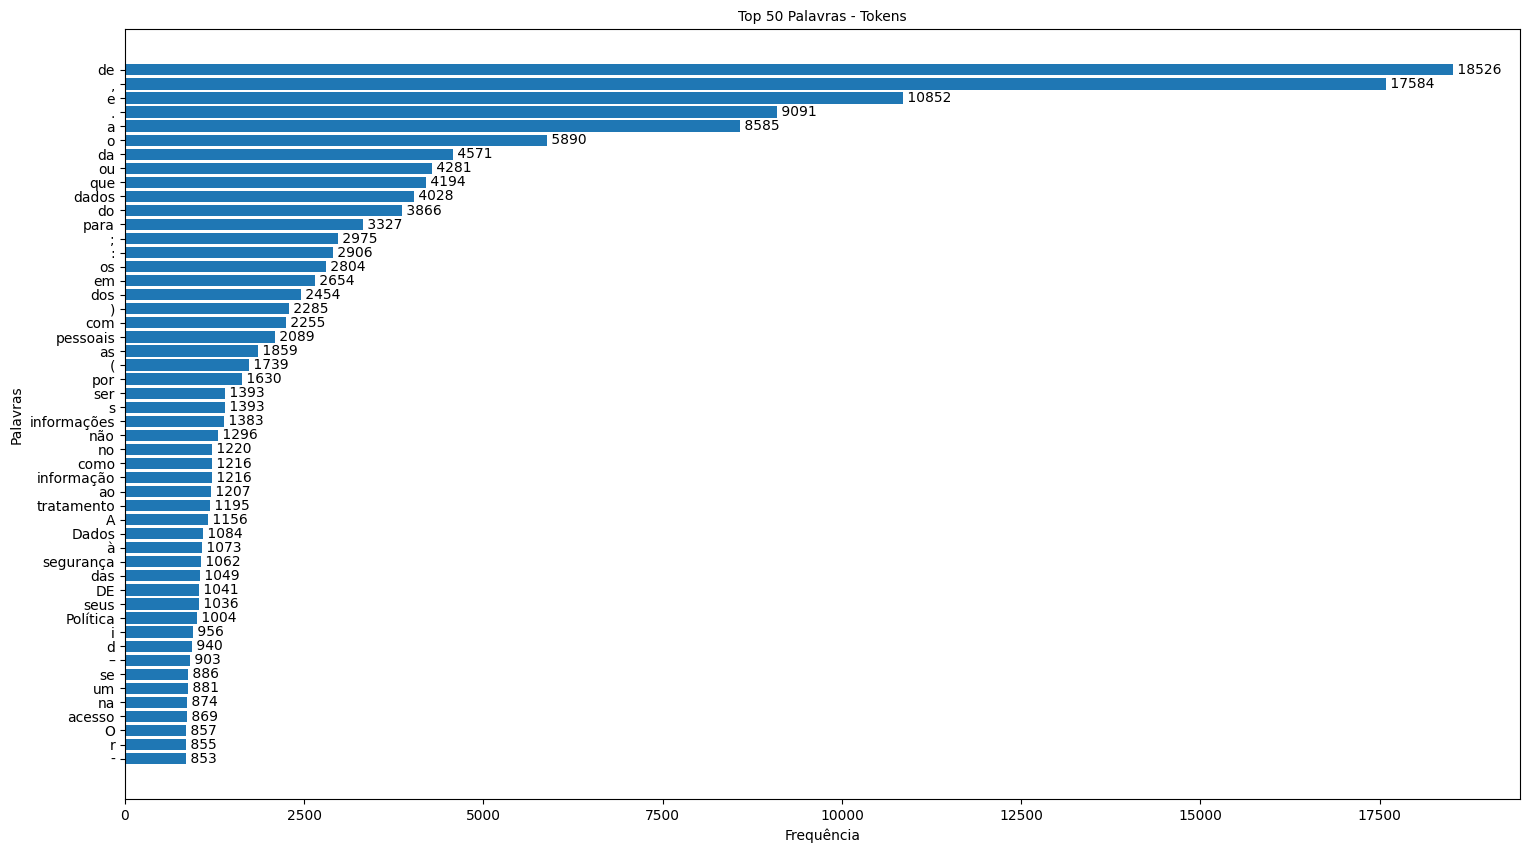

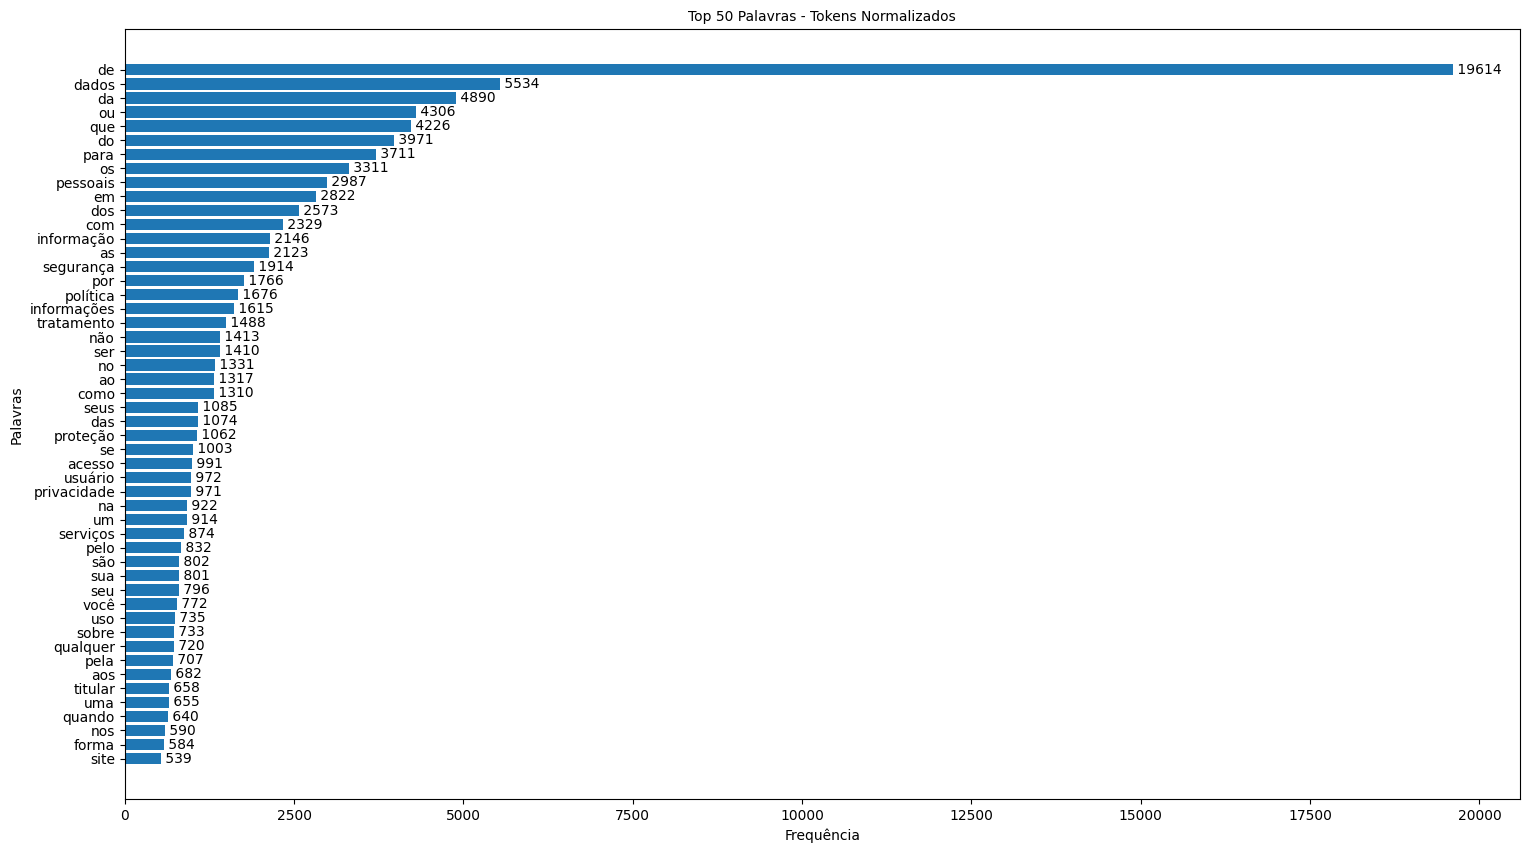

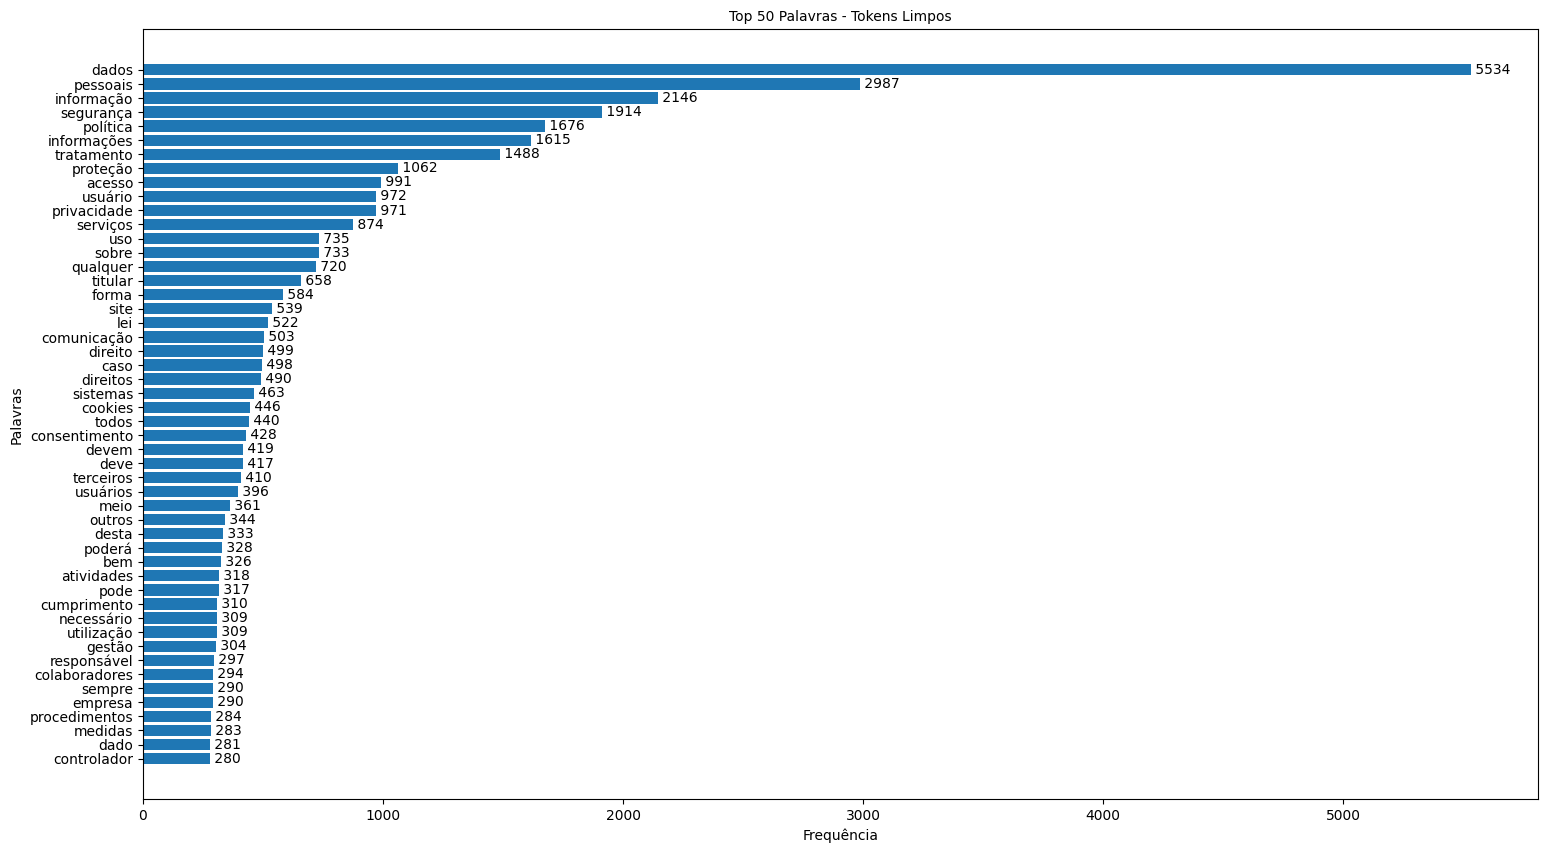

In [ ]:
# Função para plotar as 50 palavras mais frequentes
def plot_top_tokens(tokens, title):
    """Plota um gráfico de barras das 50 palavras mais frequentes.

    Args:
    tokens (list): Lista de tokens.
    title (str): Título para o gráfico.
    """
    freq_dist = nltk.FreqDist(tokens)  # Contagem de frequência dos tokens
    top_tokens = freq_dist.most_common(50)  # Obtém os 50 tokens mais comuns

    words, counts = zip(*top_tokens)  # Separa palavras e contagens

    plt.figure(figsize=(18, 10))
    bars = plt.barh(words[::-1], counts[::-1])  # Inverte as listas para que o gráfico seja ordenado de baixo para cima

    plt.xlabel('Frequência', fontsize=10)
    plt.ylabel('Palavras', fontsize=10)
    plt.title(title, fontsize=10)

    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)

    # Adiciona as contagens em cada barra
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                 f' {bar.get_width()}',
                 va='center', ha='left', fontsize=10, color='black')

    plt.show()


# Exemplo de aplicação das funções (Suponha que 'df' é o seu DataFrame e 'Text' contém os textos brutos)
text_data = ' '.join(df['Text'])  # Concatena todos os textos em uma única string

# Processo de tokenização, normalização e remoção de stopwords
tokens = tokenize_text(text_data)
normalized_tokens = normalize_text(tokens)
clean_tokens = remove_stopwords(normalized_tokens)

# Plotando as palavras mais frequentes para cada estágio do processamento
plot_top_tokens(tokens, 'Top 50 Palavras - Tokens')
plot_top_tokens(normalized_tokens, 'Top 50 Palavras - Tokens Normalizados')
plot_top_tokens(clean_tokens, 'Top 50 Palavras - Tokens Limpos')

##Análise de n-gramas

In [ ]:

# Certifique-se de que os recursos do NLTK foram baixados
nltk.download('punkt')

# Definindo a função para gerar n-gramas, excluindo palavras com um único caractere
def generate_ngrams(text, n=2):
    # Tokenize e filtre palavras com menos de dois caracteres
    tokens = [token for token in nltk.word_tokenize(text) if len(token) > 1]
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Contador para armazenar a frequência dos n-gramas
n_grams_counter = Counter()
n_most_common = 30

# Loop através de cada texto no DataFrame
for text in df['Processed_Text']:
    # Chamar a função para gerar bigramas
    n_grams_counter.update(generate_ngrams(text))

# Selecione os n_most_common bigramas mais frequentes
n_grams_counter = dict(n_grams_counter.most_common(n_most_common))

# Crie um gráfico de barras
fig = go.Figure([go.Bar(x=list(n_grams_counter.keys()), y=list(n_grams_counter.values()))])
fig.update_layout(title_text=f'Top {n_most_common} Most Frequent Bigrams in the Text')
fig.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:

# Certifique-se de que os recursos do NLTK foram baixados
nltk.download('punkt')

# Definindo a função para gerar n-gramas, excluindo palavras com um único caractere
def generate_ngrams(text, n=3):
    # Tokenize e filtre palavras com menos de dois caracteres
    tokens = [token for token in nltk.word_tokenize(text) if len(token) > 1]
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Contador para armazenar a frequência dos n-gramas
n_grams_counter = Counter()
n_most_common = 30

# Loop através de cada texto no DataFrame
for text in df['Processed_Text']:
    # Chamar a função para gerar bigramas
    n_grams_counter.update(generate_ngrams(text))

# Selecione os n_most_common bigramas mais frequentes
n_grams_counter = dict(n_grams_counter.most_common(n_most_common))

# Crie um gráfico de barras
fig = go.Figure([go.Bar(x=list(n_grams_counter.keys()), y=list(n_grams_counter.values()))])
fig.update_layout(title_text=f'Top {n_most_common} Most Frequent Bigrams in the Text')
fig.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##TF-IDF top 50 Palavras

In [ ]:
# Transforma a coluna de texto processado em uma lista, criando um corpus
corpus = df['Processed_Text'].tolist()

# Criação do objeto TfidfVectorizer e transformação do corpus em matriz TF-IDF
vectorizer = TfidfVectorizer()  # Inicializa o TfidfVectorizer
X = vectorizer.fit_transform(corpus)  # Aplica a transformação TF-IDF ao corpus

# Criação do DataFrame com as features TF-IDF
feature_names = vectorizer.get_feature_names_out()  # Extrai os nomes das features, que são as palavras do corpus
df_tfidf = pd.DataFrame(X.toarray(), columns=feature_names, index=df['Filename'])  # Cria um DataFrame com os valores TF-IDF

# Encontrar as 50 palavras mais frequentes em todo o corpus (não apenas por documento)
# Isso é feito somando os valores TF-IDF de cada termo em todos os documentos
word_totals = df_tfidf.sum(axis=0).sort_values(ascending=False)  # Calcula a soma dos valores TF-IDF por termo e ordena em ordem decrescente
top_50_words = word_totals.head(50).index  # Seleciona os índices das 50 palavras com as maiores somas

# Criar um subconjunto do DataFrame original de TF-IDF para incluir apenas as top 50 palavras
df_top_tfidf = df_tfidf[top_50_words]  # Filtra o DataFrame para incluir apenas as colunas correspondentes às top 50 palavras

# Plotagem usando Plotly, com palavras no eixo Y e arquivos no eixo X
fig = px.imshow(df_top_tfidf.T, color_continuous_scale='blues', aspect='auto', labels=dict(x="Arquivo", y="Palavra", color="Score TF-IDF"))  # Cria uma imagem do DataFrame transposto
fig.update_layout(title='Representações TF-IDF das 50 Palavras Mais Frequentes', title_x=0.5,
                  width=1000, height=1300,  # Configura o tamanho e layout do gráfico
                  margin=dict(l=50, r=50, b=100, t=100, pad=4))  # Ajusta as margens
fig.update_xaxes(side="bottom")  # Posiciona o eixo X no topo do gráfico
fig.show()  # Exibe o gráfico

#Similaridade de Coseno

In [ ]:
# df' é um DataFrame com duas colunas: 'Filename' e 'Processed_Text'
clean_corpus = df['Processed_Text'].tolist()
file_names = df['Filename'].tolist()

# Função para calcular embeddings TF-IDF para o corpus
def calculate_tfidf_embeddings(corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X, vectorizer.get_feature_names_out()

# Função para criar uma matriz de similaridade e plotar
def plot_similarity_matrix(corpus_embeddings, labels):
    similarity_matrix = cosine_similarity(corpus_embeddings)
    similarity_df = pd.DataFrame(similarity_matrix, columns=labels, index=labels)
    fig = px.imshow(similarity_df, color_continuous_scale='blues', labels=dict(x="Arquivo", y="Arquivo"))
    fig.update_layout(width=800, height=800, xaxis=dict(side="top"))
    fig.show()
    return similarity_df

# Executando as funções
tfidf_embeddings, _ = calculate_tfidf_embeddings(clean_corpus)

# Plotar a matriz de similaridade para o corpus
similarity_df = plot_similarity_matrix(tfidf_embeddings, file_names)


#Similariade entre Documentos

In [ ]:
# Inicialize o TfidfVectorizer e transforme o corpus em vetores de documentos
vectorizer = TfidfVectorizer()
doc_vectors = vectorizer.fit_transform(clean_corpus).toarray()

# Função para calcular similaridade cruzada
def cross_similarity(vectors):
    # Calcular a similaridade de cosseno entre todos os pares de vetores
    similarities = cosine_similarity(vectors)
    # Zerar a diagonal para excluir a auto-similaridade
    np.fill_diagonal(similarities, 0)
    return similarities

# Calcular similaridades cruzadas
similarities = cross_similarity(doc_vectors)

# Encontrar a maior similaridade entre dois documentos e seus índices
max_similarity = np.max(similarities)
max_similarity_indices = np.where(similarities == max_similarity)
print(f"A maior similaridade é {max_similarity:.2f} entre os documentos {max_similarity_indices[0][0]} e {max_similarity_indices[1][0]}")

# Encontrar os 10 pares de documentos mais similares e seus índices
most_similar = np.argsort(similarities, axis=None)[-10:]
most_similar_indices = np.unravel_index(most_similar, similarities.shape)
print(f"Os 10 pares de documentos mais similares estão nos índices {most_similar_indices}")


A maior similaridade é 0.92 entre os documentos 35 e 80
Os 10 pares de documentos mais similares estão nos índices (array([41, 80, 83, 41, 41, 70, 30, 53, 80, 35]), array([80, 41, 41, 83, 70, 41, 53, 30, 35, 80]))


In [ ]:
def print_text_by_index(df, index):
    """
    Print the text from the dataframe given an index.

    Args:
        df (pd.DataFrame): DataFrame containing the texts.
        index (int): Index of the document to print.
    """
    try:
        print(df['Processed_Text'].iloc[index])
    except IndexError:
        print("Index out of range.")
    except KeyError:
        print("Column 'Processed_Text' does not exist in DataFrame.")


def print_n_most_similar_pairs(df, similarities_matrix, n=10):
    """
    Print n most similar document pairs and their similarity scores.

    Args:
        df (pd.DataFrame): DataFrame containing the texts.
        similarities_matrix (np.array): Array of cosine similarity scores.
        n (int): Number of top similar pairs to print.
    """
    # Encontrar os índices dos pares mais similares
    sorted_indices = np.argsort(similarities_matrix, axis=None)[::-1]
    flat_similarities = similarities_matrix.flatten()
    unique_pairs = set()
    i = 0

    print("----------- Análise de n pares similares -----------")

    # Continue até encontrar n pares únicos
    while len(unique_pairs) < n and i < len(sorted_indices):
        idx_flat = sorted_indices[i]
        idx1, idx2 = np.unravel_index(idx_flat, similarities_matrix.shape)

        # Evitar contar a similaridade de um documento com ele mesmo e pares duplicados
        if idx1 != idx2 and (idx2, idx1) not in unique_pairs:
            unique_pairs.add((idx1, idx2))
            similarity_score = flat_similarities[idx_flat]
            print(f"Par #{len(unique_pairs)}: Documento {idx1} e Documento {idx2} - Similaridade: {similarity_score:.2f}")
            print("Texto do Documento {}: ".format(idx1))
            print_text_by_index(df, idx1)
            print("\nTexto do Documento {}: ".format(idx2))
            print_text_by_index(df, idx2)
            print("\n" + "-"*80 + "\n")

        i += 1

    if len(unique_pairs) < n:
        print("Foram encontrados apenas {} pares únicos.".format(len(unique_pairs)))



In [ ]:
# Imprimir os pares de textos mais similares
print_n_most_similar_pairs(df, similarities, n=10)

#Unsupervised

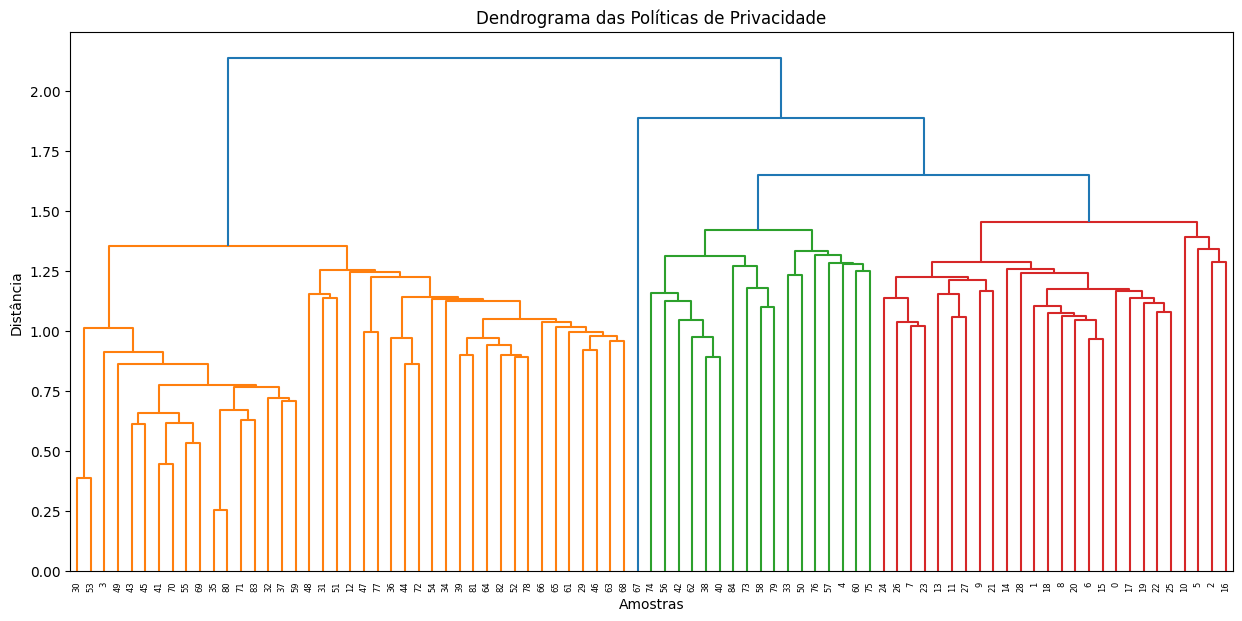

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

# Obtendo medida de distância baseada no cosseno
similarity_distance = 1 - cosine_similarity(tfidf_embeddings.toarray())

# Computa a sequência de grupos unidos usando a ligação média
mergings = linkage(similarity_distance, method='average')

# Configura o dendrograma
plt.figure(figsize=(15, 7))
dendrogram(mergings, leaf_rotation=90)
plt.title("Dendrograma das Políticas de Privacidade")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()


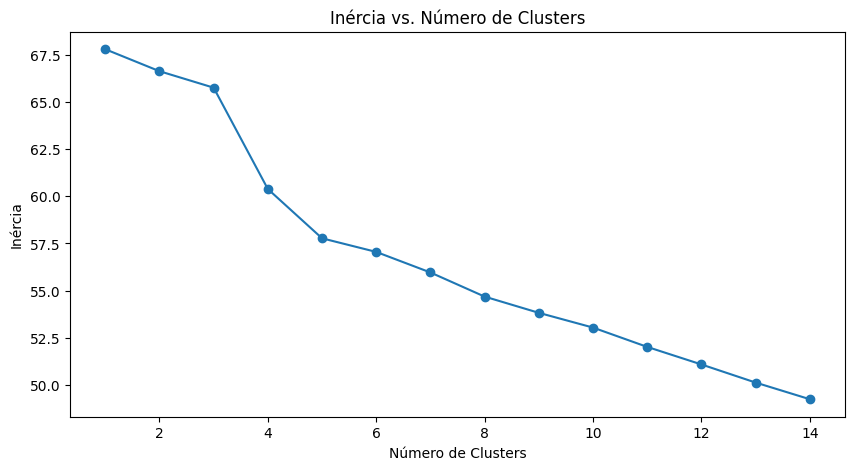

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Quantidade de grupos que vamos realizar os testes
ks = range(1, 15)
# Armazena o valor do índice para cada partição gerada
inertias = []

for k in ks:
    # Executa o k-means para aquela quantidade de grupos
    km = KMeans(n_clusters=k, random_state=8, n_init='auto')
    # Aplica a configuração do agrupamento gerado aos dados para obter o índice
    km.fit(tfidf_embeddings)
    # Calcula o erro quadrático médio
    inertias.append(km.inertia_)

# Plota o gráfico de inércia
plt.figure(figsize=(10, 5))
plt.plot(ks, inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Inércia vs. Número de Clusters')
plt.show()


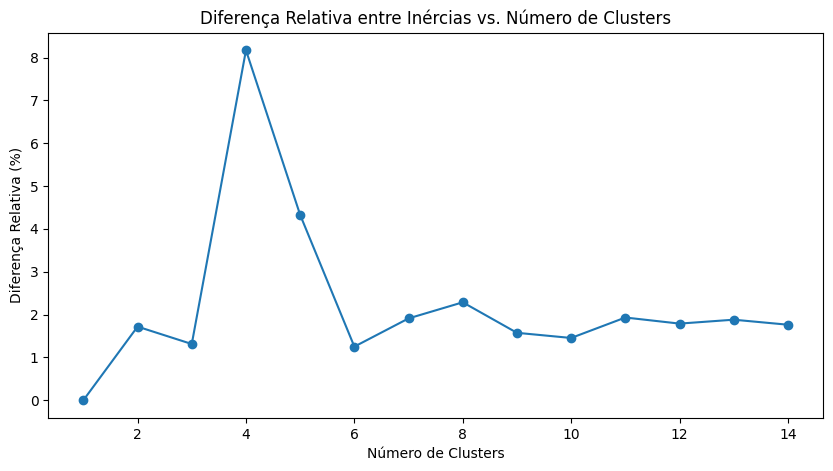

In [ ]:
# Calculando a diferença relativa entre as inércias
diff = [(1 - (inertias[i] / inertias[i-1]))*100 if i > 0 else 0 for i in range(0, len(inertias))]
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(diff)+1), diff, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Diferença Relativa (%)')
plt.title('Diferença Relativa entre Inércias vs. Número de Clusters')
plt.show()


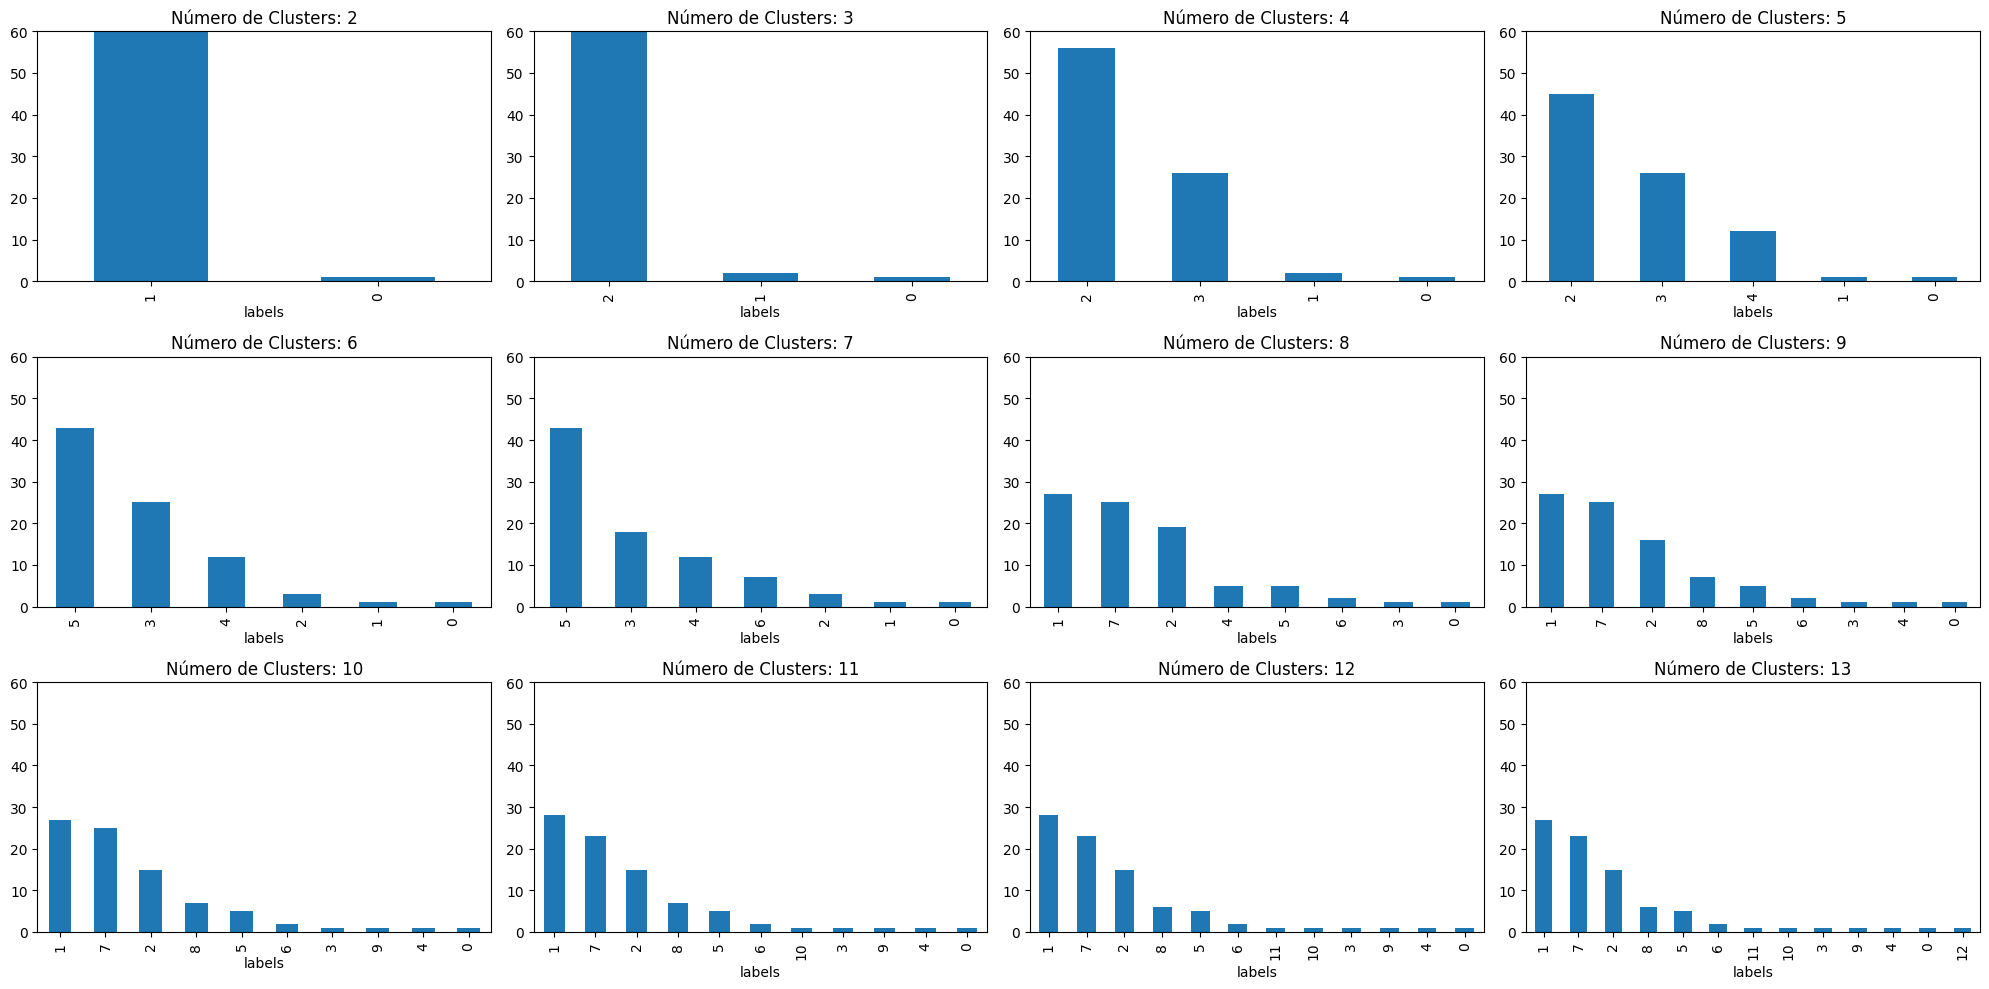

In [ ]:
# Configuração do gráfico que vai ser gerado
fig, axs = plt.subplots(3, 4, figsize=(20, 10), facecolor='w', edgecolor='k')
axs = axs.ravel()

# DataFrame para armazenar os dados
cluster_df = pd.DataFrame()

# Intervalo com a quantidade de grupos que vamos dividir os dados
ks = range(2, 14)
for k in ks:
    # Executa o k-means para cada quantidade de grupos
    km = KMeans(n_clusters=k, random_state=8, n_init='auto')
    # Relaciona o resultado gerado com os dados da base
    km.fit(tfidf_embeddings)
    # Resgata os rótulos (grupos) para cada objeto da base
    labels = km.labels_.tolist()
    # Cria um DataFrame para facilitar a contagem dos objetos em cada grupo
    cluster_df['labels'] = labels
    # Plota a quantidade de objetos em cada grupo
    cluster_df['labels'].value_counts().plot(kind='bar', ax=axs[k-2], ylim=(0,60))
    axs[k-2].set_title(f'Número de Clusters: {k}')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Definindo o número de clusters
n_clusters = 4

# Executa o k-means com 4 clusters
km = KMeans(n_clusters=n_clusters, random_state=8, n_init='auto')
km.fit(tfidf_embeddings)
df['Cluster'] = km.labels_

# Exibir DataFrame com os rótulos de cluster
print(df[['Filename', 'Cluster']].head())


              Filename  Cluster
0         BV_banco.pdf        3
1             CGEE.pdf        3
2           CODATA.pdf        3
3  DB_diagnosticos.pdf        2
4    unimedChapeco.pdf        2


In [ ]:
from sklearn.cluster import KMeans

# Definir o número de clusters como 4
num_clusters = 5

# Inicializar e ajustar o modelo KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=8, n_init='auto')
df['Cluster'] = kmeans.fit_predict(tfidf_embeddings)

# Exibir os arquivos pertencentes a cada cluster
for cluster in range(num_clusters):
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster]['Filename'].values)


Cluster 0:
['prontlife.pdf']
Cluster 1:
['compliancedva.pdf']
Cluster 2:
['DB_diagnosticos.pdf' 'unimedChapeco.pdf' 'SafariCapital.pdf'
 'alunoonline.pdf' 'redeveiculos.pdf' 'meuplanoclaro.pdf' 'estadao.pdf'
 'saberemrede.pdf' 'mziq.pdf' 'ufscar.pdf' 'valia.pdf' 'coris.pdf'
 'v8tech.pdf' 'automotivebusiness.pdf' 'fundacaosagres.pdf'
 'vinicolabarbaraeliodora.pdf' 'unifacol.pdf' 'wfaccioli.pdf' 'stan.pdf'
 'futureutilidades.pdf' 'anberr.pdf' 'botconversa.pdf' 'metrosp.pdf'
 'saofranciscovida.pdf' 'vempraglobo.pdf' 'gruposolpanamby.pdf'
 'dgemec.pdf' 'mobilidadenaseleicoes.pdf' 'soap.pdf' 'mizuhogroup.pdf'
 'metrofile.pdf' 'medens.pdf' '2prtd.pdf' 'visaoibict.pdf' '8quali.pdf'
 'desenvolvesp.pdf' 'fundacaogrupoboticario.pdf' 'legacywebsite.pdf'
 'ramadalisbon.pdf' 'tabeliao3.pdf' 'cusnag.pdf' 'ambipar.pdf'
 'fundacao_getulio_vargas.pdf' 'Grupo_Zaffari.pdf' 'BDMG.pdf']
Cluster 3:
['BV_banco.pdf' 'CGEE.pdf' 'CODATA.pdf' 'IntitutoFederalCatarinense.pdf'
 'Patris.pdf' 'INTS.pdf' 'EBCComunica

In [ ]:
def analyze_cluster_similarity(df, cluster_num):
    cluster_texts = df[df['Cluster'] == cluster_num]['Processed_Text'].tolist()
    cluster_filenames = df[df['Cluster'] == cluster_num]['Filename'].tolist()

    tfidf_embeddings, _ = calculate_tfidf_embeddings(cluster_texts)
    similarity_df = plot_similarity_matrix(tfidf_embeddings, cluster_filenames)
    return similarity_df

for cluster in range(num_clusters):
    print(f"Analisando similaridade de cosseno para o Cluster {cluster}:")
    analyze_cluster_similarity(df, cluster)


Analisando similaridade de cosseno para o Cluster 0:


Analisando similaridade de cosseno para o Cluster 1:


Analisando similaridade de cosseno para o Cluster 2:


Analisando similaridade de cosseno para o Cluster 3:


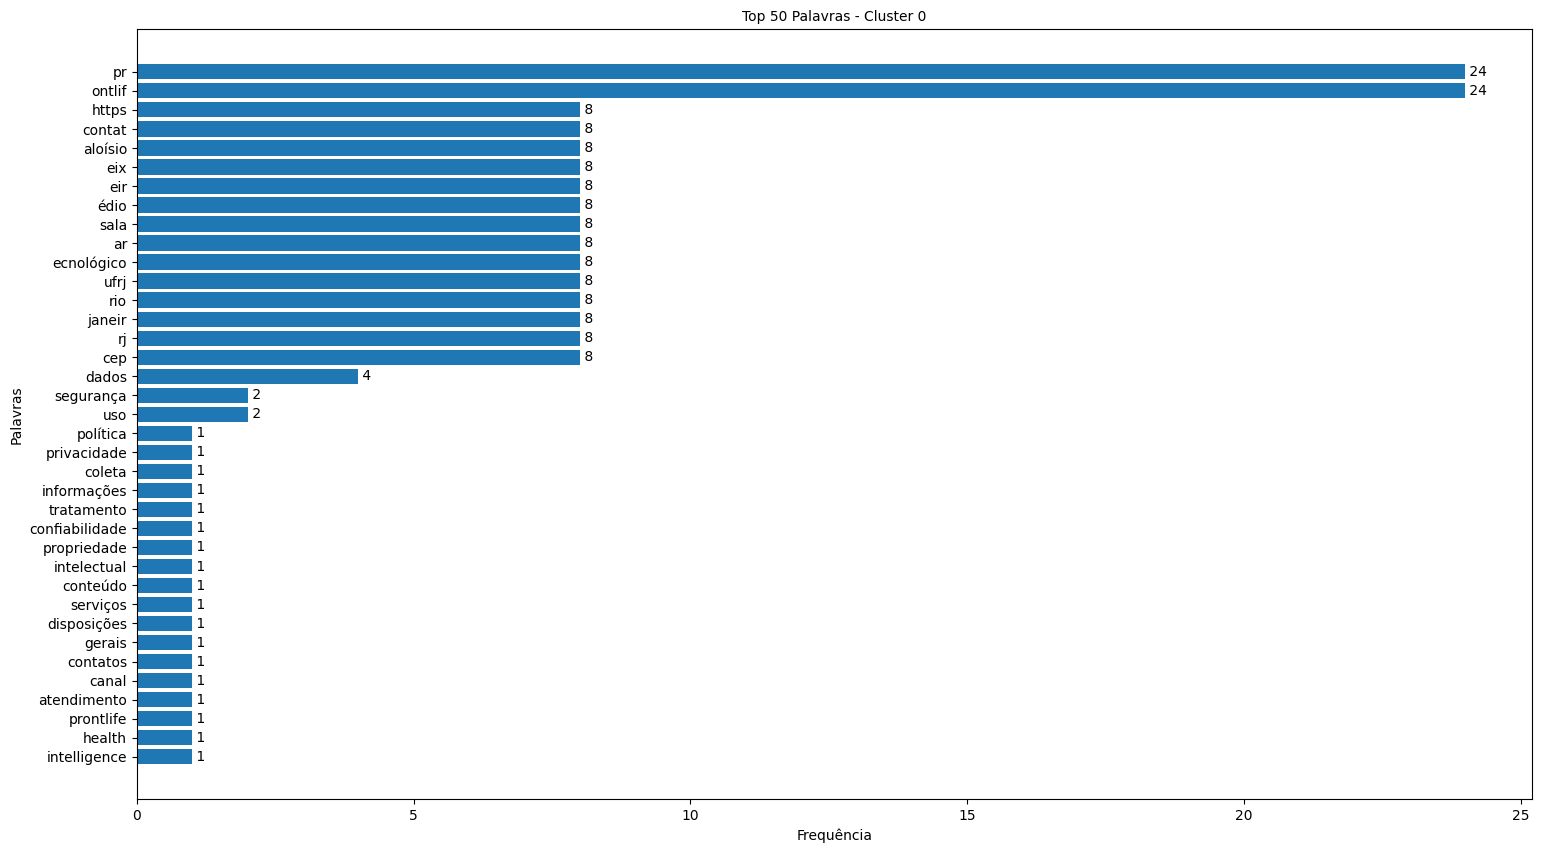

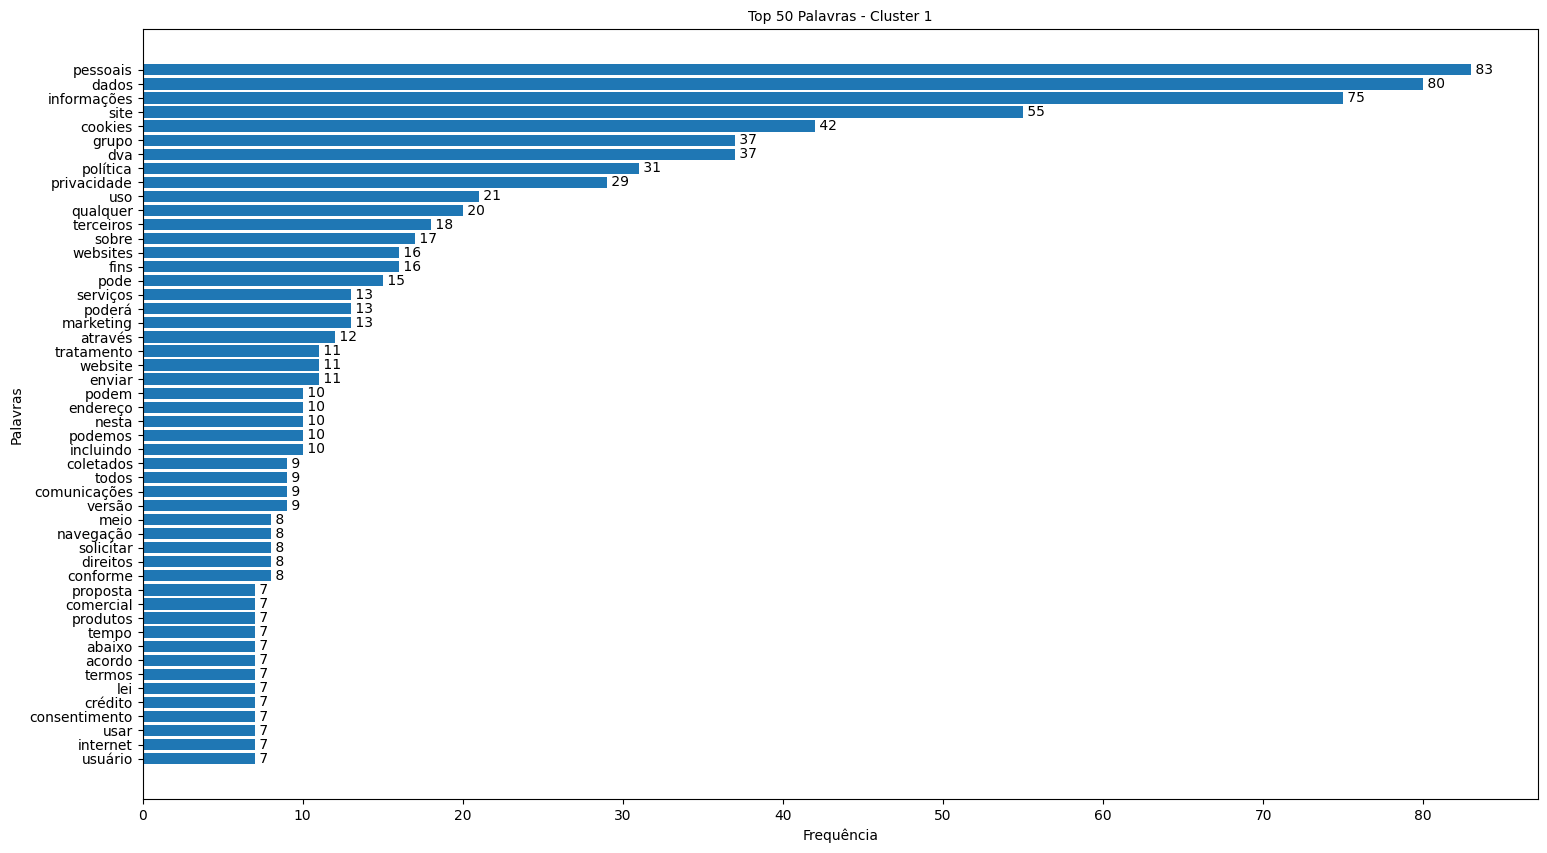

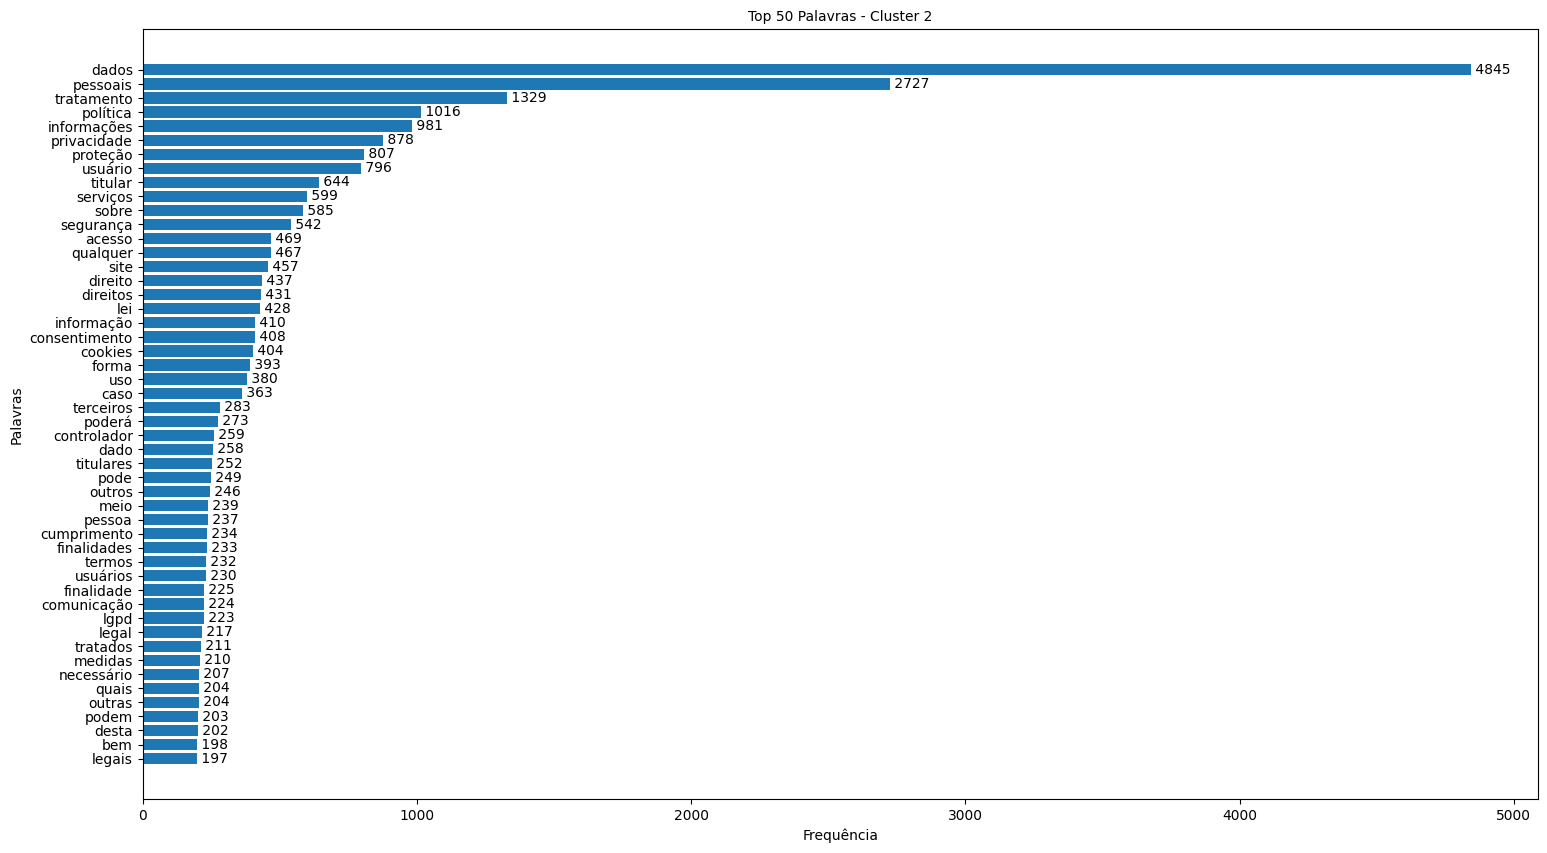

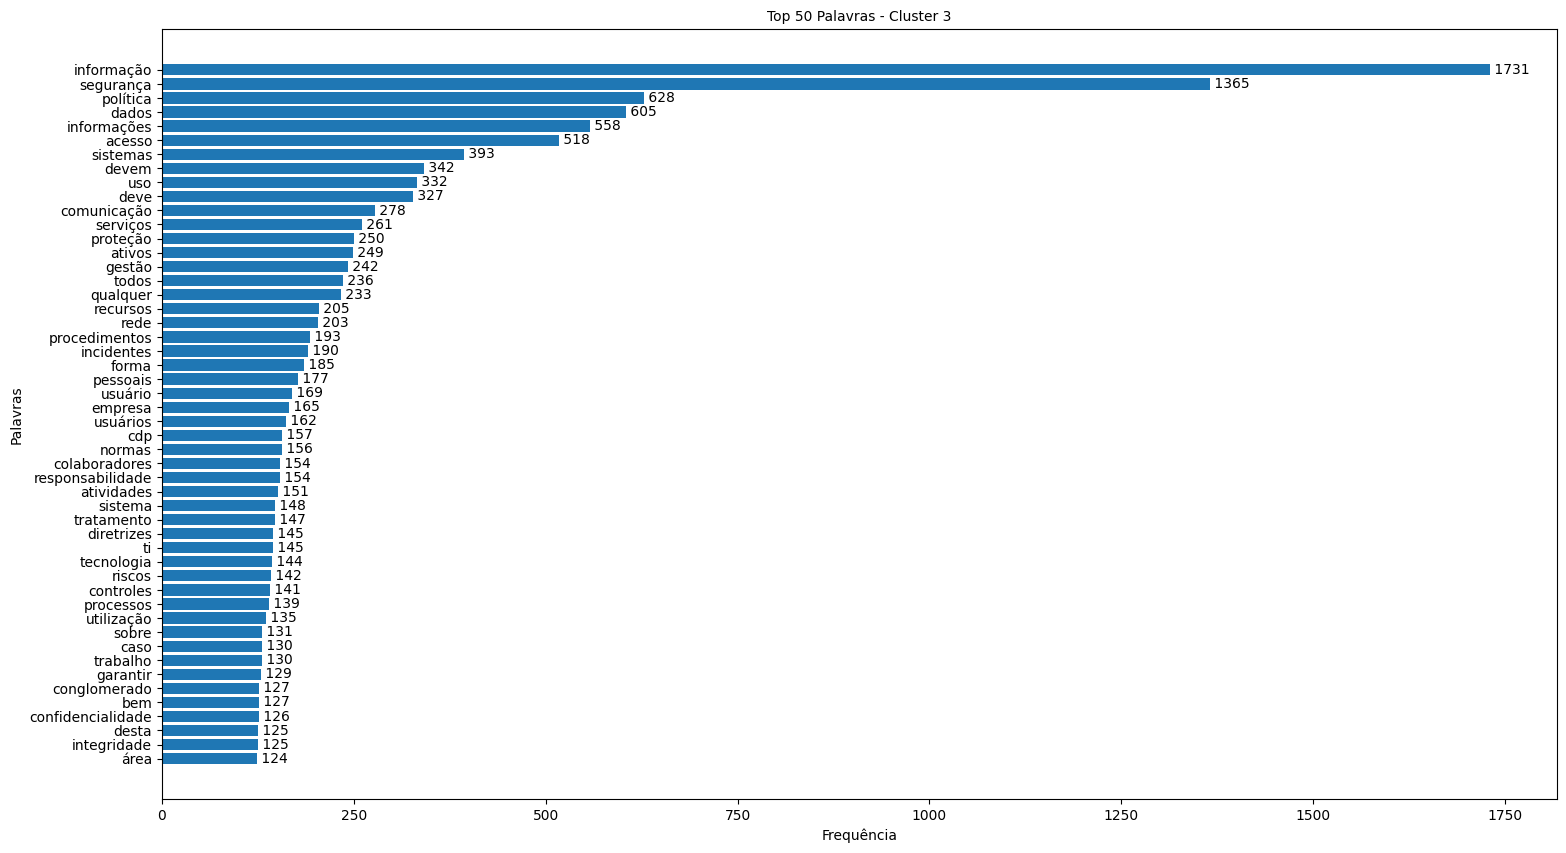

In [ ]:
def plot_cluster_top_tokens(df, cluster_num):
    cluster_texts = df[df['Cluster'] == cluster_num]['Processed_Text'].tolist()
    all_text = ' '.join(cluster_texts)

    tokens = tokenize_text(all_text)
    normalized_tokens = normalize_text(tokens)
    clean_tokens = remove_stopwords(normalized_tokens)

    plot_top_tokens(clean_tokens, f'Top 50 Palavras - Cluster {cluster_num}')

for cluster in range(num_clusters):
    plot_cluster_top_tokens(df, cluster)


In [ ]:
def plot_cluster_ngrams(df, cluster_num, n=2):
    cluster_texts = df[df['Cluster'] == cluster_num]['Processed_Text'].tolist()
    n_grams_counter = Counter()
    n_most_common = 30

    for text in cluster_texts:
        n_grams_counter.update(generate_ngrams(text, n))

    n_grams_counter = dict(n_grams_counter.most_common(n_most_common))

    fig = go.Figure([go.Bar(x=list(n_grams_counter.keys()), y=list(n_grams_counter.values()))])
    fig.update_layout(title_text=f'Top {n_most_common} Most Frequent {n}-grams in Cluster {cluster_num}')
    fig.show()

for cluster in range(num_clusters):
    plot_cluster_ngrams(df, cluster, n=2)
    plot_cluster_ngrams(df, cluster, n=3)


In [ ]:
from collections import defaultdict

def generate_unique_ngrams_per_cluster(df, n=2):
    all_ngrams_per_cluster = defaultdict(Counter)

    for cluster in range(num_clusters):
        cluster_texts = df[df['Cluster'] == cluster]['Processed_Text'].tolist()
        n_grams_counter = Counter()

        for text in cluster_texts:
            n_grams_counter.update(generate_ngrams(text, n))

        all_ngrams_per_cluster[cluster] = n_grams_counter

    unique_ngrams_per_cluster = defaultdict(Counter)
    for cluster in range(num_clusters):
        other_ngrams = Counter()
        for other_cluster in range(num_clusters):
            if other_cluster != cluster:
                other_ngrams.update(all_ngrams_per_cluster[other_cluster])

        unique_ngrams = {ngram: count for ngram, count in all_ngrams_per_cluster[cluster].items() if ngram not in other_ngrams}
        unique_ngrams_per_cluster[cluster] = Counter(unique_ngrams)

    return unique_ngrams_per_cluster


In [ ]:
def plot_unique_ngrams(unique_ngrams_per_cluster, n, n_most_common=30):
    for cluster in range(num_clusters):
        n_grams_counter = unique_ngrams_per_cluster[cluster]
        n_grams_counter = dict(n_grams_counter.most_common(n_most_common))

        fig = go.Figure([go.Bar(x=list(n_grams_counter.keys()), y=list(n_grams_counter.values()))])
        fig.update_layout(title_text=f'Top {n_most_common} Most Frequent Unique {n}-grams in Cluster {cluster}')
        fig.show()


In [ ]:
# Geração de n-gramas únicos por cluster e plotagem
unique_bigrams_per_cluster = generate_unique_ngrams_per_cluster(df, n=2)
unique_trigrams_per_cluster = generate_unique_ngrams_per_cluster(df, n=3)

plot_unique_ngrams(unique_bigrams_per_cluster, n=2, n_most_common=30)
plot_unique_ngrams(unique_trigrams_per_cluster, n=3, n_most_common=30)